<div style="border:solid purple 2px; padding: 20px">

Привет! 👋

Меня зовут Рустам Муртазин, и я буду делать ревью твоей работы. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Я не хочу указывать тебе на совершенные тобою ошибки, а хочу поделиться своим опытом и помочь тебе стать настоящим профессионалом и сделать проект еще лучше.

Обрати внимание в первую очередь на те, что помечены <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). Также в проекте могут быть небольшие «лайфхаки» по Python, не относящиеся к проекту, их я выделил фиолетовым цветом)

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

По проекту есть пару замечаний, но их не много, я думаю ты быстро справишься. Жду твою работу на повторное ревью :)


<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Спасибо за быструю и качественную доработку комментариев! Я просмотрел твои доработки, там все здорово и корректно, добавил пару комментариев.
    
Надеюсь ты учтешь мои комментарии в последующих работах. Благодарю за старания и интерес и желаю успехов в дальнейших проектах 😊

</div>

# Описание проекта

Вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину. 

Шаги для выбора локации обычно такие:
- В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
- Строят модель для предсказания объёма запасов в новых скважинах;
- Выбирают скважины с самыми высокими оценками значений;
- Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. \
Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. \
Проанализируйте возможную прибыль и риски техникой Bootstrap.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    import phik
except ImportError:
    !pip install phik
    import phik

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import (
    accuracy_score, mean_absolute_error, mean_squared_error,
    r2_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, make_scorer
)

from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, OneHotEncoder,
    OrdinalEncoder, LabelEncoder, PolynomialFeatures
)


     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Все ли из этого нужно? Зачем импортировать лишние библиотеки, которые не используются в проекте, но могут быть причиной краха кода? У меня, например, ругался на отсутствие optuna.integration...

<div style="background-color: lightblue; padding: 10px; border: 1px solid blue; border-radius: 5px; width: 300px; margin: 10px;">
    <h2 style="color: navy;">Комментарий студента</h2>
    странно, что ругается, так я запускал в окружении практикума. я из проекта в проект тяну этот заголовочный файл, не думал, что его подключение может так нагружать
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Дело в том, что у тебя в практикуме свое окружение, а у меня свое)

##  Подготовка данных

In [2]:
try:
    geo_data_first = pd.read_csv('geo_data_0.csv')
except:
    geo_data_first = pd.read_csv('/datasets/geo_data_0.csv')
try:
    geo_data_second = pd.read_csv('geo_data_1.csv')
except:
    geo_data_second = pd.read_csv('/datasets/geo_data_1.csv')
try:
    geo_data_third = pd.read_csv('geo_data_2.csv')
except:
    geo_data_third = pd.read_csv('/datasets/geo_data_2.csv')

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Здорово, что ты используешь конструкцию `try-except`, это повышает отказоустойчивость кода

</div>

In [3]:
display(geo_data_first.head(5), geo_data_second.head(5), geo_data_third.head(5))

,Unnamed: 0,id,f0,f1,f2,product
0,0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,2,409Wp,1.022732,0.151990,1.419926,85.265647
3,3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,Unnamed: 0,id,f0,f1,f2,product
0,0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,Unnamed: 0,id,f0,f1,f2,product
0,0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Видим три таблицы со столбцами:
- `id` - уникальный идентификатор скважины
- `f0, f1, f2` - три признака точек
- `product` - объяем запасов в скважине

In [4]:
display(geo_data_first.isna().sum(), geo_data_second.isna().sum(), geo_data_third.isna().sum())

Unnamed: 0    0
id            0
f0            0
f1            0
f2            0
product       0
dtype: int64

Unnamed: 0    0
id            0
f0            0
f1            0
f2            0
product       0
dtype: int64

Unnamed: 0    0
id            0
f0            0
f1            0
f2            0
product       0
dtype: int64

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

В данном проекте мы работаем с данными одинаковой природы, а это значит, что большинство расчетов для регионов будут повторяться. Это отличная возможность потренироваться над оптимизацией кода. Например, вот здесь. Первичное знакомство с данными можно было реализовать в функции и вызывать эту функцию для каждого из датафреймов (в цикле в идеале)

Пропуски в данных не обнаружены, проверим данные на дубликаты в столбце `id`

In [5]:
display(geo_data_first['id'].duplicated().sum(), geo_data_second['id'].duplicated().sum(), geo_data_third['id'].duplicated().sum())

10

4

4

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Да, по некоторым скважинам информация дублируется, возможно, произошел какой-то баг при записи данных в базу, а возможно и нет. В любом случае, данный момент нужно уточнять у заказчика. Я бы вынес его отдельно, в конец проекта, например

Проверим данные с дубликатами

In [6]:
geo_data_first[geo_data_first['id'].duplicated()]

,Unnamed: 0,id,f0,f1,f2,product
7530,7530,HZww2,1.061194,-0.373969,10.430210,158.828695
41724,41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
51970,51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
63593,63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
66136,66136,74z30,1.084962,-0.312358,6.990771,127.643327
69163,69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
75715,75715,Tdehs,0.112079,0.430296,3.218993,60.964018
90815,90815,fiKDv,0.049883,0.841313,6.394613,137.346586
92341,92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
97785,97785,bsk9y,0.378429,0.005837,0.160827,160.637302


In [7]:
geo_data_first[geo_data_first['id'] == 'HZww2']

,Unnamed: 0,id,f0,f1,f2,product
931,931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,7530,HZww2,1.061194,-0.373969,10.430210,158.828695


Посмотрим, какую долю данных составляют дубликаты

In [8]:
geo_data_first[geo_data_first['id'].duplicated()].shape[0] / geo_data_first.shape[0]

0.0001

In [9]:
geo_data_second[geo_data_second['id'].duplicated()].shape[0] / geo_data_second.shape[0]

4e-05

In [10]:
geo_data_third[geo_data_third['id'].duplicated()].shape[0] / geo_data_third.shape[0]

4e-05

Как видно, строк с дубликатами крайне мало, потому отбросим их

In [11]:
geo_data_first = geo_data_first.drop_duplicates(subset='id').reset_index(drop=True)

In [12]:
geo_data_first[geo_data_first['id'].duplicated()].shape[0] / geo_data_first.shape[0]

0.0

In [13]:
geo_data_second = geo_data_second.drop_duplicates(subset='id').reset_index(drop=True)

In [14]:
geo_data_second[geo_data_second['id'].duplicated()].shape[0] / geo_data_second.shape[0]

0.0

In [15]:
geo_data_third = geo_data_third.drop_duplicates(subset='id').reset_index(drop=True)

In [16]:
geo_data_third[geo_data_third['id'].duplicated()].shape[0] / geo_data_third.shape[0]

0.0

In [17]:
geo_data_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  99990 non-null  int64  
 1   id          99990 non-null  object 
 2   f0          99990 non-null  float64
 3   f1          99990 non-null  float64
 4   f2          99990 non-null  float64
 5   product     99990 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.6+ MB


In [18]:
geo_data_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99996 entries, 0 to 99995
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  99996 non-null  int64  
 1   id          99996 non-null  object 
 2   f0          99996 non-null  float64
 3   f1          99996 non-null  float64
 4   f2          99996 non-null  float64
 5   product     99996 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.6+ MB


In [19]:
geo_data_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99996 entries, 0 to 99995
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  99996 non-null  int64  
 1   id          99996 non-null  object 
 2   f0          99996 non-null  float64
 3   f1          99996 non-null  float64
 4   f2          99996 non-null  float64
 5   product     99996 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.6+ MB


Очевидно, что объем не может быть отрицательным, сначала проверим столбец на такие аномалии, в случае чего возьмем столбец по модулю

In [20]:
display(geo_data_first["product"].describe(), geo_data_second["product"].describe(), geo_data_third["product"].describe())

count    99990.000000
mean        92.499684
std         44.288304
min          0.000000
25%         56.497069
50%         91.847928
75%        128.563699
max        185.364347
Name: product, dtype: float64

count    99996.000000
mean        68.823916
std         45.944663
min          0.000000
25%         26.953261
50%         57.085625
75%        107.813044
max        137.945408
Name: product, dtype: float64

count    99996.000000
mean        94.998342
std         44.749573
min          0.000000
25%         59.450028
50%         94.925026
75%        130.586815
max        190.029838
Name: product, dtype: float64

Отрицательных значений не обнаружено

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

А они там есть, отрицательные значения?

<div style="background-color: lightblue; padding: 10px; border: 1px solid blue; border-radius: 5px; width: 300px; margin: 10px;">
    <h2 style="color: navy;">Комментарий студента</h2>
    не думаю, что решение взять по модулю без проверки критическое замечание, функция довольна проста, как и операция взятия по модулю. Если аномальные значения присутствуют, то запишется их абсолютное значение. Возможно логичнее использовать функцию, которая проверяет значение на отрицательность и только в случае успеха перезаписывает, в таком случае по идее произойдет меньше операций. Не думаю, что данная функция сильно тормозит проект, так что ее использование без проверки(заведомо зная, что ничего в данных не испортится) ошибка 
</div>


<div style="background-color: lightblue; padding: 10px; border: 1px solid blue; border-radius: 5px; width: 300px; margin: 10px;">
    <h2 style="color: navy;">Комментарий студента</h2>
    если прям сильно прикапываться к правильности кода и оптимизации, то даже сравнивать value < 0 нельзя, так как числа вещественные, потому следует в подобной функции использовать эпсилон. просто я думаю машинное обучение больше про исследования данных чем то же программирование, само собой какие-то не эффективные алгоритмы и прочее несуразно использовать
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Согласен, замечание не критическое. Но при этом я за то, чтобы каждое действие было сделано с определенной целью и причинами. Ведь делать что-то, чтобы просто было, можно много чего)

## Вывод по предобработке данных:
Пропусков в данных не обнаружено, но были найдены дубликаты, которые оказались отброшены ввиду их незначительного количества

## Исследовательский анализ данных

In [21]:
def get_cat_n_num_cols(data) -> ([], []) :
    cols = data.columns
    cat_cols = []
    num_cols = []
    for col in cols:
        if col == 'id' or col == 'Unnamed: 0': continue
        else:
            if data[col].dtype == 'object':
                cat_cols.append(col)
            else:
                num_cols.append(col)
    return (cat_cols, num_cols)


In [22]:
cols_tuple = get_cat_n_num_cols(geo_data_first)
cat_cols = cols_tuple[0]
num_cols = cols_tuple[1]
num_cols

['f0', 'f1', 'f2', 'product']

In [23]:
import math
def num_cols_plot(data, num_cols):
    df_name = [name for name, var in globals().items() if isinstance(var, pd.DataFrame) and var is data][0]
    print(f'FILE: {df_name}')
    for col in num_cols:
        print("\n")
        data[col].hist(bins = math.ceil(np.log(len(data[col].unique())) + 1))
        plt.xlim(data[col].min(), data[col].max() * 1.1)
        plt.title(f"Частота значения для {col}")
        plt.ylabel('Частота')
        plt.xlabel('Количество')
        plt.show()
        print("\n")
        plt.boxplot(data[col])
        plt.title(f"Ящик с усами для {col}")
        plt.ylabel('Значения')
        plt.show()
        print("\n")
        print("Статистика")
        display(data[col].describe())
        print("\n")
        print("\n")

FILE: geo_data_first




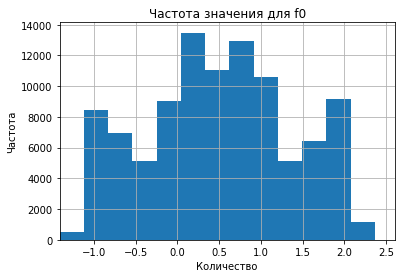

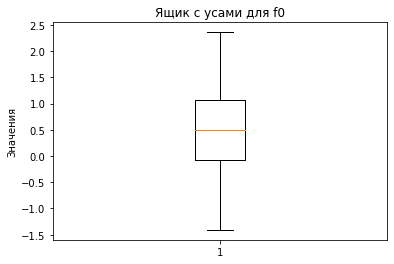



Статистика


count    99990.000000
mean         0.500454
std          0.871844
min         -1.408605
25%         -0.072572
50%          0.502405
75%          1.073626
max          2.362331
Name: f0, dtype: float64

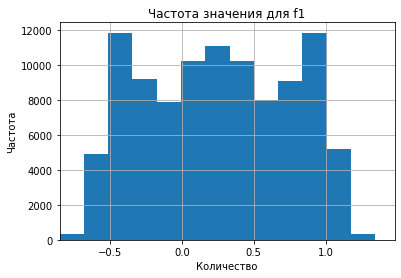

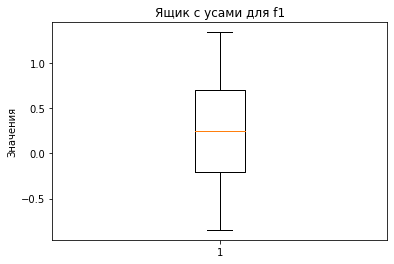



Статистика


count    99990.000000
mean         0.250141
std          0.504430
min         -0.848218
25%         -0.200877
50%          0.250252
75%          0.700640
max          1.343769
Name: f1, dtype: float64

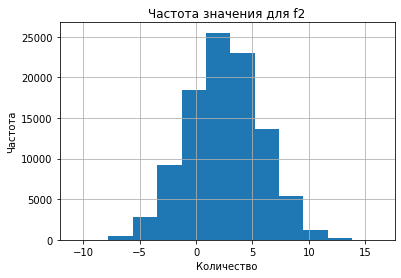

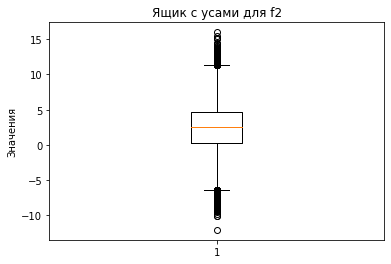



Статистика


count    99990.000000
mean         2.502629
std          3.248149
min        -12.088328
25%          0.287784
50%          2.515969
75%          4.715035
max         16.003790
Name: f2, dtype: float64

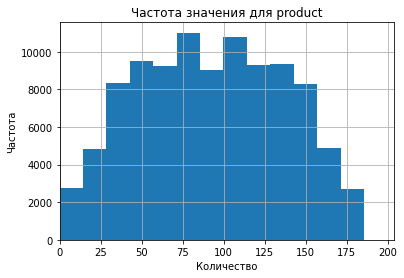

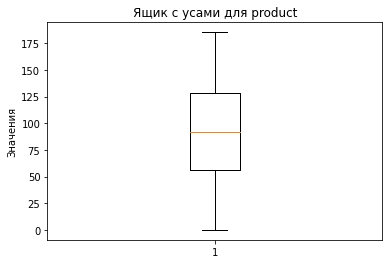



Статистика


count    99990.000000
mean        92.499684
std         44.288304
min          0.000000
25%         56.497069
50%         91.847928
75%        128.563699
max        185.364347
Name: product, dtype: float64

In [24]:
num_cols_plot(geo_data_first, num_cols)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Эти два графика (гистограмму распределения и боксплот) я бы расположил друг под другом, при этом удачное решение расположить боксплот горизонтально, тогда графики будут друг под другом, и у них как бы будет единая ось икс
    
</div>

FILE: geo_data_second




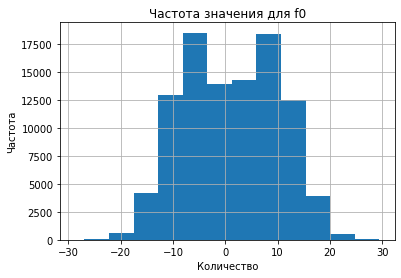

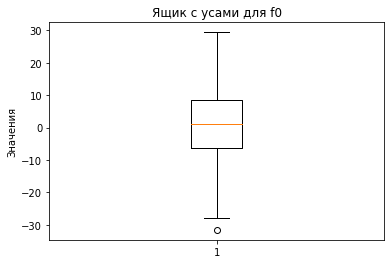



Статистика


count    99996.000000
mean         1.141209
std          8.965815
min        -31.609576
25%         -6.298551
50%          1.153055
75%          8.620964
max         29.421755
Name: f0, dtype: float64

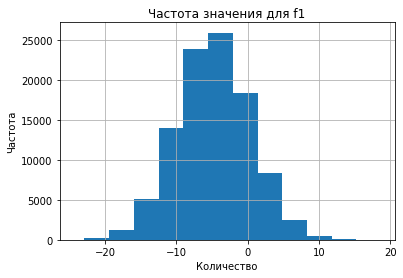

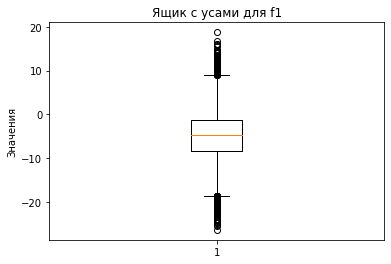



Статистика


count    99996.000000
mean        -4.796608
std          5.119906
min        -26.358598
25%         -8.267985
50%         -4.813172
75%         -1.332816
max         18.734063
Name: f1, dtype: float64

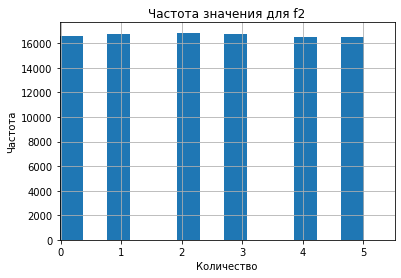

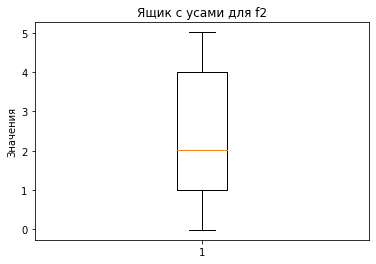



Статистика


count    99996.000000
mean         2.494501
std          1.703579
min         -0.018144
25%          1.000021
50%          2.011475
75%          3.999904
max          5.019721
Name: f2, dtype: float64

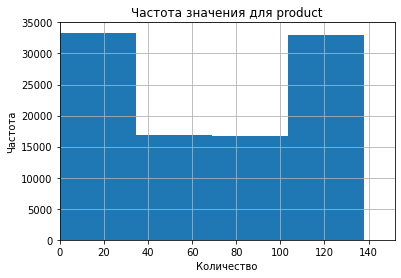

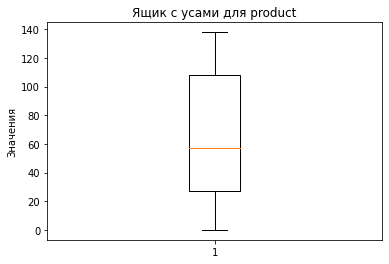



Статистика


count    99996.000000
mean        68.823916
std         45.944663
min          0.000000
25%         26.953261
50%         57.085625
75%        107.813044
max        137.945408
Name: product, dtype: float64

In [25]:
num_cols_plot(geo_data_second, num_cols)

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

По Unnamed: 0 кажется не обязательно строить графики?

<div style="background-color: lightblue; padding: 10px; border: 1px solid blue; border-radius: 5px; width: 300px; margin: 10px;">
    <h2 style="color: navy;">Комментарий студента</h2>
    Очень странно, что этот столбец вообще появляется, я проверял, его не было)
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Да, согласен, странно, возможно это связано с разными версиями пандаса...

FILE: geo_data_third




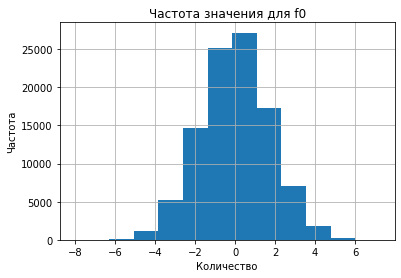

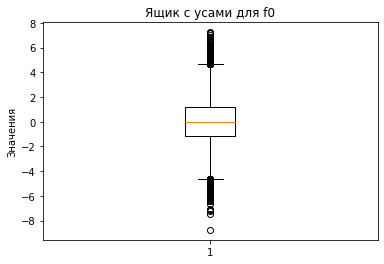



Статистика


count    99996.000000
mean         0.002002
std          1.732052
min         -8.760004
25%         -1.162328
50%          0.009424
75%          1.158477
max          7.238262
Name: f0, dtype: float64

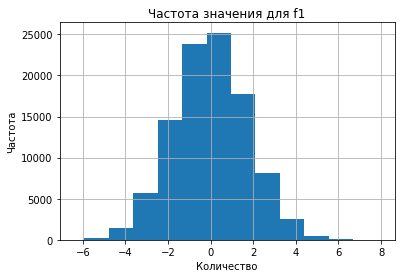

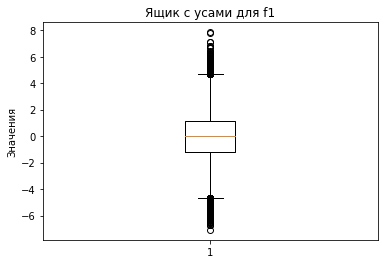



Статистика


count    99996.000000
mean        -0.002159
std          1.730397
min         -7.084020
25%         -1.174841
50%         -0.009661
75%          1.163523
max          7.844801
Name: f1, dtype: float64

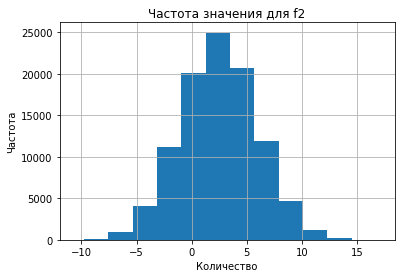

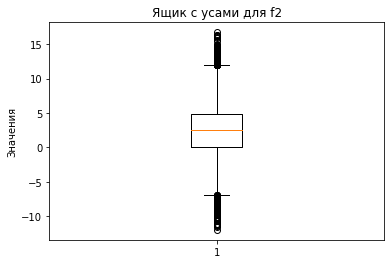



Статистика


count    99996.000000
mean         2.495084
std          3.473482
min        -11.970335
25%          0.130269
50%          2.484236
75%          4.858720
max         16.739402
Name: f2, dtype: float64

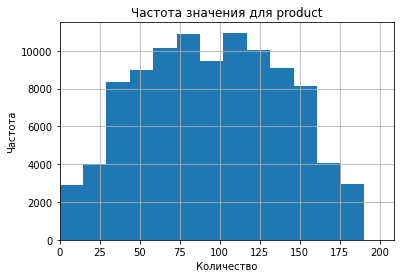

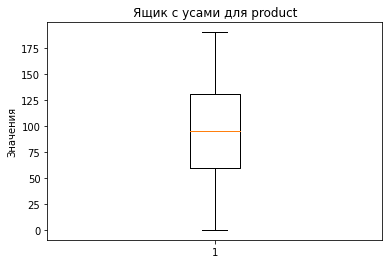



Статистика


count    99996.000000
mean        94.998342
std         44.749573
min          0.000000
25%         59.450028
50%         94.925026
75%        130.586815
max        190.029838
Name: product, dtype: float64

In [26]:
num_cols_plot(geo_data_third, num_cols)

## Вывод по исследовательскому анализу
Про `f0, f1, f2` тяжело что-то сказать и как-то объяснить распределение и выборосы, но вот что можно сказать касательно `product`:
- Минимальное значение = 0
- Максимальное значение = 185 000, 137 000, 190 000 баррелей
- Медиана ~90 000 баррелей и 57 000 баррелей
- Распределения признаков не являются одинаковыми

## Корреляционный анализ

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Unnamed: 0 is large: 99990. Are you sure this is not an interval variable? Analysis for pairs of variables including Unnamed: 0 can be slow.
  warnings.warn(


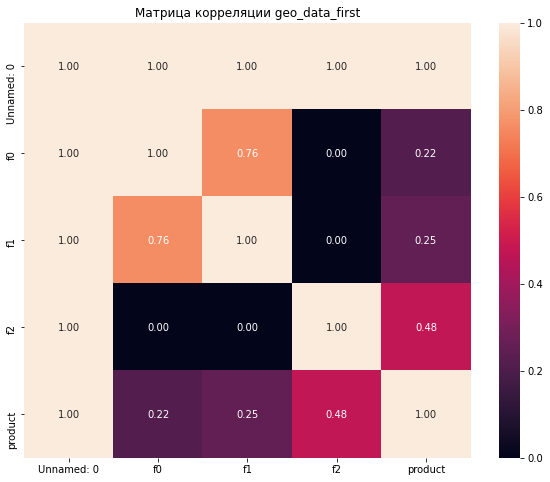

In [27]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(geo_data_first.drop(['id'], axis=1).phik_matrix(interval_cols = num_cols), annot=True, fmt='.2f', ax=axes)

plt.title('Матрица корреляции geo_data_first')
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Очень правильное решение посмотреть корреляции. Хотя я бы еще построил диаграммы рассеивания. По ним можно обнаружить нелинейные зависимости, которые мы коэффициентами корреляции Пирсона не выявим

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Unnamed: 0 is large: 99996. Are you sure this is not an interval variable? Analysis for pairs of variables including Unnamed: 0 can be slow.
  warnings.warn(


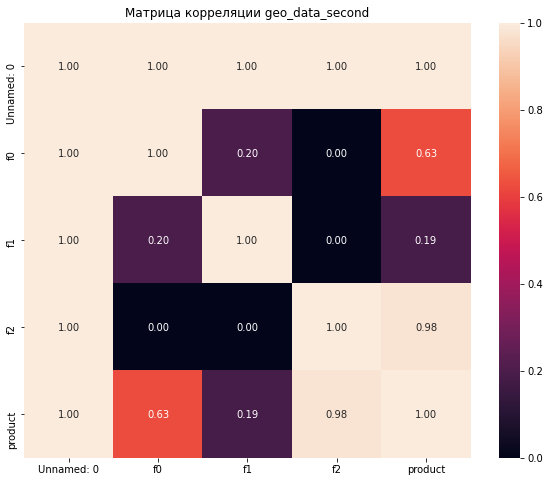

In [28]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(geo_data_second.drop(['id'], axis=1).phik_matrix(interval_cols = num_cols), annot=True, fmt='.2f', ax=axes)

plt.title('Матрица корреляции geo_data_second')
plt.show()

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Unnamed: 0 is large: 99996. Are you sure this is not an interval variable? Analysis for pairs of variables including Unnamed: 0 can be slow.
  warnings.warn(


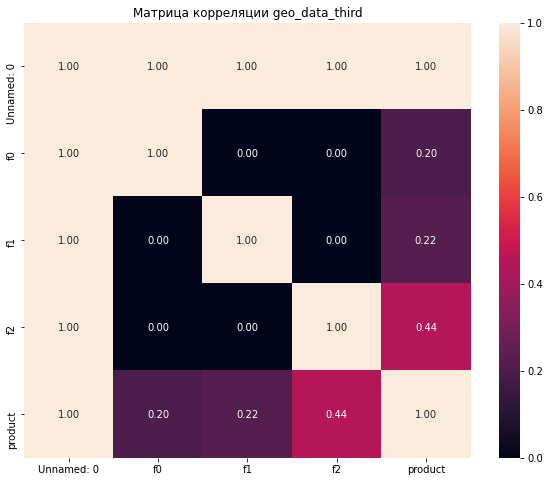

In [29]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(geo_data_third.drop(['id'], axis=1).phik_matrix(interval_cols = num_cols), annot=True, fmt='.2f', ax=axes)

plt.title('Матрица корреляции geo_data_third')
plt.show()

## Вывод по корреляционному анализу
Заметим, что `f2` во всех случаях имеет самый большой коэффициент корреляции, во втором датасете `f2` даже очень сильно коррелирует с target признаком

## Обучение моделей

In [30]:
RANDOM_STATE = 42
def train_n_predict(data):
    model_lr = LinearRegression()
    X = data.drop(['product', 'id'], axis = 1)
    y = data['product']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE, test_size = 0.25)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model_lr.fit(X_train_scaled, y_train)
    predictions = model_lr.predict(X_test_scaled)
    rmse_score = mean_squared_error(y_test, predictions, squared = False)
    r2 = r2_score(y_test, predictions)
    mean_predicted_product = predictions.mean() 
    return rmse_score, r2, mean_predicted_product, predictions, y_test

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Круто, что ты фиксируешь `random_state`. Кстати, его можно задать один раз в начале проекта, например, используя любимый нами [numpy](https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do)

In [31]:
tmp_geo_data_fr = train_n_predict(geo_data_first)
tmp_geo_data_sc = train_n_predict(geo_data_second)
tmp_geo_data_th = train_n_predict(geo_data_third)
rmse_fr, r2_fr, mean_pred_prod_fr, pred_fr, true_fr = train_n_predict(geo_data_first)
rmse_sc, r2_sc, mean_pred_prod_sc, pred_sc, true_sc = train_n_predict(geo_data_second)
rmse_th, r2_th, mean_pred_prod_th, pred_th, true_th = train_n_predict(geo_data_third)
print(f'RMSE = {rmse_fr}, средний запас предсказанного сырья = {mean_pred_prod_fr}, r2 = {r2_fr}')
print(f'RMSE = {rmse_sc}, средний запас предсказанного сырья = {mean_pred_prod_sc}, r2 = {r2_sc}')
print(f'RMSE = {rmse_th}, средний запас предсказанного сырья = {mean_pred_prod_th}, r2 = {r2_th}')

RMSE = 37.685449282914554, средний запас предсказанного сырья = 92.61042181873445, r2 = 0.27452523946748064
RMSE = 0.8927499238079175, средний запас предсказанного сырья = 68.57708250195154, r2 = 0.9996227495573733
RMSE = 40.081937229383584, средний запас предсказанного сырья = 94.93621391668762, r2 = 0.19480144880517858


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Выполнить стандартизацию - правильный шаг. Хотя в нашем случае нам повезло, признаки не сильно отличаются диапазоном изменения значений.

Заметим, что показания rmse сильно разнятся в каждом регионе, как и средний запас(что вполне логично, так как и распределения у features отличались от регионов, а также и средний запас в каждом регионе)

In [32]:
tmp_geo_data_fr = (rmse_fr, r2_fr, mean_pred_prod_fr)
tmp_geo_data_sc = (rmse_sc, r2_sc, mean_pred_prod_sc)
tmp_geo_data_th = (rmse_th, r2_th, mean_pred_prod_th)
data_tuple = (tmp_geo_data_fr, tmp_geo_data_sc, tmp_geo_data_th)
pred_data = pd.DataFrame(data_tuple, columns = ['rmse', 'r2', 'средний_запас_сырья'])
pred_data['регион'] = [1, 2, 3]

In [33]:
pred_data

,rmse,r2,средний_запас_сырья,регион
0,37.685449,0.274525,92.610422,1
1,0.892750,0.999623,68.577083,2
2,40.081937,0.194801,94.936214,3


## Вывод по обучению моделей
Во втором регионе показатеоь rmse оказался самым малым, а также я проверил показатель r2, который очень близок к 1, скорее это связано сильной корреляцией `f2` признака в этом регионе, в следствие чего модель очень хорошо себя показала в предсказаниях

В первом и третьем регионе rmse оказался равным ~40 (1 - 37, 3 - 40), однако показатели r2 сравнительно низкие (0.27, 0.19 соответственно)

В первом регионе средний запас предсказанного сырья = 92.6, во втором - 68.6, в третьем - 95

## Подготовка к расчету прибыли

In [34]:
total_budget = 10*10**9
max_points = 500
check_points = 200
price_barrel = 450000
threshold = 0.025
enough_volume = (total_budget / (price_barrel)) / check_points 
print("Достаточный объем = ", round(enough_volume, 0) * 1000, "баррелей")

Достаточный объем =  111000.0 баррелей


<div class="alert alert-warning">

<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

По правилам написания кода [PEP8](https://pep8.org/), константы определяют заглавными буквами)

Подсчитаем, какой процент скважин считаются безубыточными в каждом регионе

In [35]:
def find_good_points(data, threshold_value):
    percent_greater_than_threshold = (data['product'] > threshold_value).mean() * 100
    return int(percent_greater_than_threshold)

print(f'{find_good_points(geo_data_first, enough_volume)}% точек больше сырья чем {int(enough_volume)} тысяч баррелей')
print(f'{find_good_points(geo_data_second, enough_volume)}% точек больше сырья чем {int(enough_volume)} тысяч баррелей')
print(f'{find_good_points(geo_data_third, enough_volume)}% точек больше сырья чем {int(enough_volume)} тысяч баррелей')

36% точек больше сырья чем 111 тысяч баррелей
16% точек больше сырья чем 111 тысяч баррелей
38% точек больше сырья чем 111 тысяч баррелей


Получаем следующие проценты для безубыточных скважин в каждом регионе
- 36% 1 регион
- 16% 2 регион
- 38% 3 регион

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Я бы в этом блоке акцентировал на другом внимание. Тот факт, что средние ни по одному из регионов не дотягивают до точки безубыточности говорит нам о том, что мы не можем рандомно выбирать скважины для разработки, ведь в таком случае, нас, возможно, ждет неудача. Соответственно нужно выбирать самы жирные скважины, а для этого нужны модели

## Расчет прибыли и рисков

In [36]:
def income(true, pred):
    pred = pd.Series(pred).sort_values(ascending=False)[:check_points]
    true = true.iloc[pred.index].reset_index(drop=True)
    summary = true.sum() 
    return round((summary * price_barrel) - total_budget, 2)


In [37]:
print('Прибыль с 200 скважин в первом регионе', income(true_fr, pred_fr))
print('Прибыль с 200 скважин во втором регионе', income(true_sc, pred_sc))
print('Прибыль с 200 скважин в третьем регионе', income(true_th, pred_th))

Прибыль с 200 скважин в первом регионе 3468529787.42
Прибыль с 200 скважин во втором регионе 2415086696.68
Прибыль с 200 скважин в третьем регионе 2403696307.46


<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Проводить обучение повторно - крайне неэффективно. Предлагаю использовать результаты прошлых расчетов, из блока 2. Сохрани прогнозные значения для валидационной выборки там и работай с ней)

Итого получаем самую большую прибыль в первом регионе = 3468529787

Рассчитаем 95% доверительный интервал при помощи bootstrap

In [38]:
def conf_interval(pred, true):
    state = np.random.RandomState(12345)
    values = []
    pred = pd.Series(pred)
    pred.index = true.index
    for i in range(1000):
        subsample_true = true.sample(n = max_points, replace=True, random_state = state)
        subsample_pred = pred[subsample_true.index]
        tmp = income(subsample_true, subsample_pred.values)
        values.append(tmp)
    values = pd.Series(values)
    print(values.apply(lambda x: x < 0).sum() / len(values) * 100,"%")
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean_value = values.mean()
    return lower, upper, mean_value

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Расчет рисков можно было выполнить проще, например, так

```python
risk = (values < 0).mean()
```

Либо можно использовать [percentileofscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html) от `scipy`

In [39]:
lower_bound, upper_bound, mean_value = conf_interval(pred_fr, true_fr);
print(f"95% доверительный интервал для первого региона: ({lower_bound}, {upper_bound}), среднее = {mean_value}")
lower_bound, upper_bound, mean_value = conf_interval(pred_sc, true_sc);
print(f"95% доверительный интервал для второго региона: ({lower_bound}, {upper_bound}), среднее = {mean_value}")
lower_bound, upper_bound, mean_value = conf_interval(pred_th, true_th);
print(f"95% доверительный интервал для третьего региона: ({lower_bound}, {upper_bound}), среднее = {mean_value}")

5.800000000000001 %
95% доверительный интервал для первого региона: (-96722837.807, 938814611.3064998), среднее = 417008091.65932
1.0 %
95% доверительный интервал для второго региона: (51741836.33, 863042250.0182499), среднее = 432020731.23181
9.0 %
95% доверительный интервал для третьего региона: (-173602496.27574998, 869686813.8334999), среднее = 356837970.78053004


<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

По заданию нужно дополнительно выводить средние значения

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Вот мое решение, для примера, может что-то понравится)

+------------------------+--------------------+
|       Показатель       |      Значение      |
+------------------------+--------------------+
|    Средняя выручка     |     431.7 млн      |
|          Риск          |        4.8%        |
| Доверительный интервал | -100.2 : 944.6 млн |
+------------------------+--------------------+


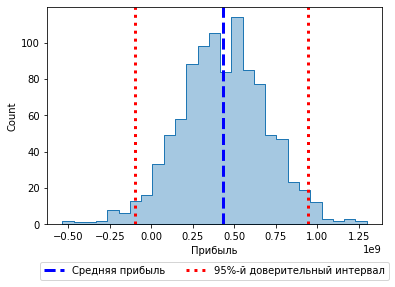

In [44]:
# !pip3 install prettytable
# from prettytable import PrettyTable
# import seaborn as sns
# from scipy import stats as st

BUDGET = 10000000000
BARREL_COST = 450
BARRELS_IN_UNIT = 1000
UNIT_COST = BARREL_COST * BARRELS_IN_UNIT
TOTAL_POINTS = 500
POINTS = 200

def revenue_2(target, predictions, points, budget, unit_cost):
    predicted_sorted = predictions.sort_values(ascending=False)
    selected = target[predicted_sorted.index][:points]
    return selected.sum() * unit_cost - budget

def bootstrap_2(target, probabilities):
    state = np.random.RandomState(888)
    values=[]
    for i in range(1000):
        target_subsample = target.sample(replace=True,\
            random_state=state, n=TOTAL_POINTS)

        probs_subsample = probabilities[target_subsample.index]
        values.append(revenue_2(target_subsample, probs_subsample, POINTS, BUDGET, UNIT_COST))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    risk = st.percentileofscore(values, 0)

     # Отображение таблицы
    table = PrettyTable()
    table.field_names = ['Показатель', 'Значение']
    table.add_row(['Средняя выручка', f'{mean/1e6:.1f} млн'])
    table.add_row(['Риск', f'{risk:.2}%'])
    table.add_row(['Доверительный интервал', f'{lower/1e6:.1f} : {upper/1e6:.1f} млн'])
    print(table)

    sns.histplot(values, alpha=0.4,  element="step")
    plt.xlabel('Прибыль')
    plt.axvline(x=mean, color='b', ls='--', lw=3, label='Средняя прибыль')
    plt.axvline(x=lower, color='r', ls=':', lw=3, label='95%-й доверительный интервал')
    plt.axvline(x=upper, color='r', ls=':', lw=3)
    plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)
    plt.show()

bootstrap_2(true_fr, pd.Series(pred_fr, index=true_fr.index))

## Вывод по расчету прибыли и рисков
- Получилось установить показатель в баррелях для безубыточной скважины - 111 000
- Самая большая прибыль с первом регионе - 3468529787
- 95% доверительный интервал для первого региона:  (-96261928.02025001, 933493095.4969997), среднее = 417354353.45570993
- 95% доверительный интервал для второго региона:  (51741836.33, 863042250.0182499), среднее = 432017870.03948 
- 95% доверительный интервал для третьего региона:  (-186256154.75749996, 892099105.673), среднее = 356881964.62191993
- По итогу самым менее рискованным регионом для бурения оказался второй, с процентным содержанием отрицательной прибыли в точках - 1%, поэтому я бы порекомендовал бурить именно в этом регионе
- В первом регионе самая большая прибыль и процент отрицательной прибыли в точках - 5.8%, на месте бизнеса я бы порекомендовал рассмотреть и этот регион, возможно стоит изучить регион подробнее и разработать более подходящую модель для предсказаний, так как прибыль хорошая, процент не такой большой


# Общий вывод

## Вывод по предобработке данных:
Пропусков в данных не обнаружено, но были найдены дубликаты, которые оказались отброшены ввиду их незначительного количества

## Вывод по исследовательскому анализу
Про `f0, f1, f2` тяжело что-то сказать и как-то объяснить распределение и выборосы, но вот что можно сказать касательно `product`:
- Минимальное значение = 0
- Максимальное значение = 185 000, 137 000, 190 000 баррелей
- Медиана ~90 000 баррелей и 57 000 баррелей
- Распределения признаков не являются одинаковыми

## Вывод по корреляционному анализу
Заметим, что `f2` во всех случаях имеет самый большой коэффициент корреляции, во втором датасете `f2` даже очень сильно коррелирует с target признаком

## Вывод по обучению моделей
Во втором регионе показатеоь rmse оказался самым малым, а также я проверил показатель r2, который очень близок к 1, скорее это связано сильной корреляцией `f2` признака в этом регионе, в следствие чего модель очень хорошо себя показала в предсказаниях

В первом и третьем регионе rmse оказался равным ~40 (1 - 37, 3 - 40), однако показатели r2 сравнительно низкие (0.27, 0.19 соответственно)

В первом регионе средний запас предсказанного сырья = 92.6, во втором - 68.6, в третьем - 95

## Вывод по расчету прибыли и рисков
- Получилось установить показатель в баррелях для безубыточной скважины - 111 000
- Самая большая прибыль с первом регионе - 3468529787
- 95% доверительный интервал для первого региона:  (-96261928.02025001, 933493095.4969997), среднее = 417354353.45570993
- 95% доверительный интервал для второго региона:  (51741836.33, 863042250.0182499), среднее = 432017870.03948 
- 95% доверительный интервал для третьего региона:  (-186256154.75749996, 892099105.673), среднее = 356881964.62191993
- По итогу самым менее рискованным регионом для бурения оказался второй, с процентным содержанием отрицательной прибыли в точках - 1%, поэтому я бы порекомендовал бурить именно в этом регионе
- В первом регионе самая большая прибыль и процент отрицательной прибыли в точках - 5.8%, на месте бизнеса я бы порекомендовал рассмотреть и этот регион, возможно стоит изучить регион подробнее и разработать более подходящую модель для предсказаний, так как прибыль хорошая, процент не такой большой


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

👍